**Importing libraries**

In [10]:
# installing apyori package
# Apyori is a simple implementation of Apriori algorithm 
# with Python 2.7 and 3.3 - 3.5, provided as APIs and as commandline interfaces.

!pip install apyori
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np
import pandas as pd

from apyori import apriori

**Importing the dataset**

In [3]:
# On va lire notre base de donnée et avoir un apercu

df = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)

(7501, 20)


In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,frozen smoothie,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


**Data Preprocessing**

In [5]:

# faire en sorte que chaque client achète des articles sur une liste identique
trans = []
for i in range(0, 7501):
  trans.append([str(df.values[i,j]) for j in range(0, 20)])

# convetir en tableau numpy
trans = np.array(trans)

# Vérifier la taille du tableau
print(trans.shape)

# Apercu sur les 10 premiers client de notre tableau
print(trans[1:10])

(7501, 20)
[['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['whole wheat pasta' 'french fries' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['soup' 'light cream' 'shallot' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['fro

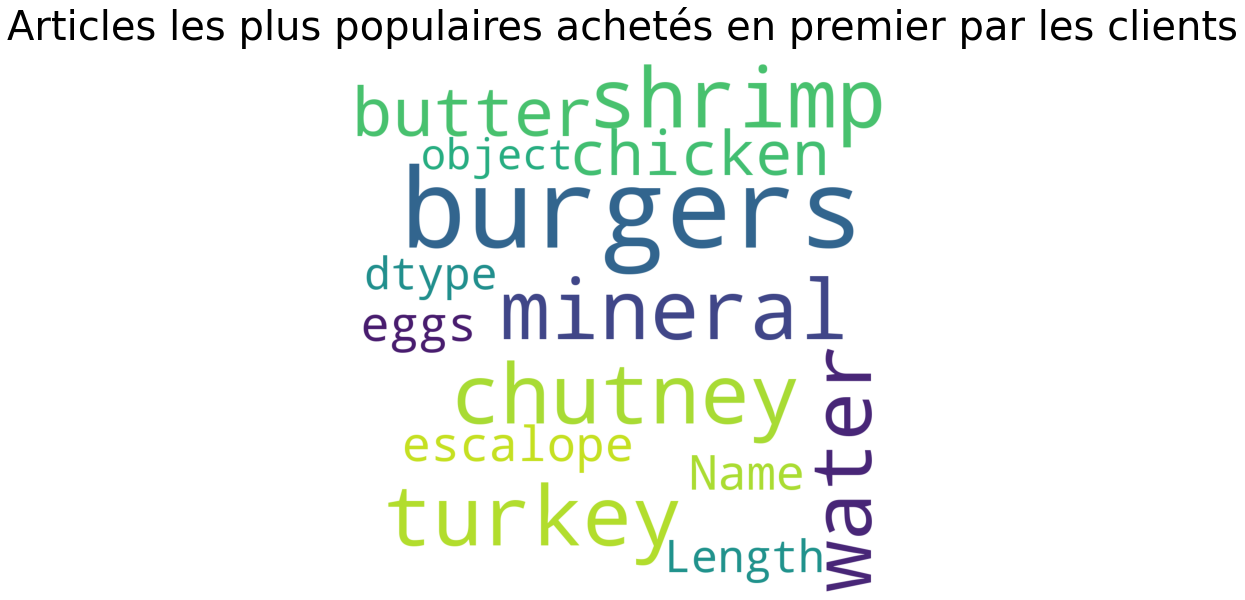

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Articles les plus populaires achetés en premier par les clients',fontsize = 40)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


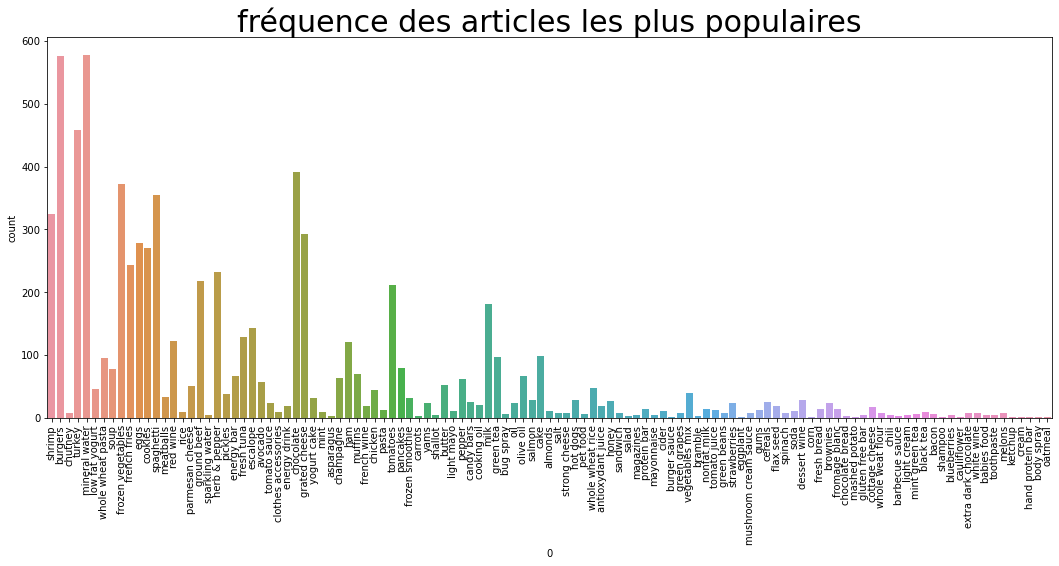

In [31]:
# fréquence des articles les plus populaires

plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(df[0])
plt.title('fréquence des articles les plus populaires', fontsize = 30)
plt.xticks(rotation = 90 )
plt.show()

**Training of the dataset**

In [38]:
# appliquer des règles a priori à notre jeu de données

trans = list(trans)
rules = apriori(trans, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)
results = list(rules)


**Visualising the results**

In [40]:

resultat = []
for item in results:
    pair = item[0]
    items = [x for x in pair]
    value0 = str(items[0])
    value1 = str(items[1])
    value2 = str(item[1])[:7]
    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    rows = (value0,value1,value2,value3,value4)
    resultat.append(rows)
labels = ['Article1','Article2','Support','Confidence', 'Lift']
suggestions_Association_Article = pd.DataFrame.from_records(resultat,columns=labels)
print(suggestions_Association_Article)



          Article1              Article2  Support Confidence     Lift
0          chicken           light cream  0.00453    0.29059  4.84395
1         escalope  mushroom cream sauce  0.00573    0.30069  3.79083
2         escalope                 pasta  0.00586    0.37288  4.70081
3    fromage blanc                 honey  0.00333    0.24509  5.16427
4      ground beef         herb & pepper  0.01599    0.32345  3.29199
..             ...                   ...      ...        ...      ...
155  mineral water             olive oil  0.00306    0.21698  3.63298
156       pancakes         mineral water  0.00306    0.21100  3.53299
157       tomatoes         mineral water  0.00306    0.26136  4.37609
158  mineral water             olive oil  0.00333    0.21186  3.22351
159       tomatoes         mineral water  0.00333    0.23809  3.98650

[160 rows x 5 columns]


La valeur de prise en charge de la première règle est 0,00453. Ce nombre est calculé en divisant le nombre de transactions contenant light cream divisé par le nombre total de transactions. Le niveau de confiance de la règle est de 0.29059 , ce qui montre que sur toutes les transactions contenant light cream, 29 % des transactions contiennent également light cream. Enfin, l'augmentation de 4.84395 nous indique que light cream est 4.84395 fois plus susceptible d'être achetée par les clients qui achètent chicken par rapport à la probabilité par défaut de la vente de light cream.